In [1]:
import tensorflow as tf
import keras
from tensorflow.keras.layers import *
from tensorflow.keras import layers, models, optimizers, losses
from tensorflow.keras.utils import plot_model

from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense
from tensorflow.keras.layers import Activation, ZeroPadding2D
from tensorflow.keras.layers import BatchNormalization, Flatten, Conv2D
from tensorflow.keras.layers import AveragePooling2D, MaxPooling2D 
from tensorflow.keras.layers import GlobalMaxPooling2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity
from tensorflow.python.framework.ops import EagerTensor

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import pickle

# import AlexNet
# import ResNet
# import vgg
# import FeatureExtractorMobileNet
# import FeatureExtractorResNet

# import AdamEX

# import Plots
# import Metrics

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert x_test.shape == (10000, 32, 32, 3)
assert y_test.shape == (10000, 1)

169001437/169001437 [==============================] - 13s 0us/step


## training data 42K
## validation data 10K
## testing data 8K

In [3]:
import tensorflow_datasets as tfds

test_set, valid_set, train_set = tfds.load("cifar100", split=["test", "train[0:8000]", "train[8000:]"],as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar100/3.0.2.incompleteATUVSJ/cifar100-train.tfrecord*...:   0%|        …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar100/3.0.2.incompleteATUVSJ/cifar100-test.tfrecord*...:   0%|         …

Dataset cifar100 downloaded and prepared to /root/tensorflow_datasets/cifar100/3.0.2. Subsequent calls will reuse this data.


AttributeError: ignored

In [8]:
print("Train set size: ", len(train_set))
print("Test set size: ", len(test_set))
print("Valid set size: ", len(valid_set))

Train set size:  42000
Test set size:  10000
Valid set size:  8000


(50000, 32, 32, 3)
[98]


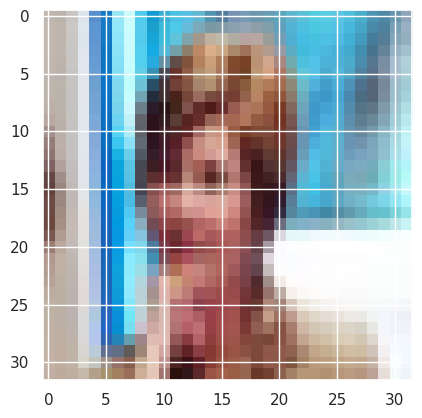

In [10]:
print(x_train.shape)
print(y_train[5913])
plt.imshow(x_train[5913])
plt.show()

In [11]:
model=tf.keras.models.Sequential()
model.add(layers.experimental.preprocessing.Resizing(227, 227, interpolation="bilinear", input_shape=(32, 32, 3)))

model.add(layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4),activation='relu',input_shape=(227, 227,3),padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(layers.Conv2D(filters=256, kernel_size=(5,5), padding="same",activation="relu",strides=(1,1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(layers.Conv2D(kernel_size=(3,3),filters=384,activation='relu',padding='same',strides=(1,1)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(filters=384,kernel_size=(3,3),padding='same',activation='relu',strides=(1,1)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(filters=256, kernel_size=(3,3),padding='same',activation='relu',strides=(1,1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(4096,activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(4096,activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(100, activation='softmax'))

model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history_alx = model.fit(x_train, tf.keras.utils.to_categorical(y_train), epochs = 50, verbose = 1,  callbacks=[callback])

In [12]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history_alx = model.fit(x_train, tf.keras.utils.to_categorical(y_train), epochs = 50, verbose = 1,  callbacks=[callback])

Epoch 1/50
1563/1563 [==============================] - 84s 44ms/step - loss: 5.3038 - accuracy: 0.0234
Epoch 2/50
1563/1563 [==============================] - 72s 46ms/step - loss: 4.4294 - accuracy: 0.0333
Epoch 3/50
1563/1563 [==============================] - 71s 46ms/step - loss: 4.3495 - accuracy: 0.0356
Epoch 4/50
1563/1563 [==============================] - 73s 47ms/step - loss: 4.2132 - accuracy: 0.0483
Epoch 5/50
1563/1563 [==============================] - 71s 45ms/step - loss: 4.0700 - accuracy: 0.0674
Epoch 6/50
1563/1563 [==============================] - 72s 46ms/step - loss: 3.8750 - accuracy: 0.0979
Epoch 7/50
1563/1563 [==============================] - 70s 45ms/step - loss: 3.6111 - accuracy: 0.1438
Epoch 8/50
1563/1563 [==============================] - 70s 45ms/step - loss: 3.3218 - accuracy: 0.1957
Epoch 9/50
1563/1563 [==============================] - 70s 45ms/step - loss: 3.1055 - accuracy: 0.2382
Epoch 10/50
1563/1563 [==============================] - 71s 45m

In [13]:
def download_history(history, name):
  import pickle
  from google.colab import files

  with open('history_' + name + '.pkl', 'wb') as f:
    pickle.dump(history.history, f)

  files.download('history_' + name + '.pkl')

In [14]:
download_history(history_alx, 'alex')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
with open('/content/history_alex.pkl', 'rb') as f:
  loaded = pickle.load(f)

In [21]:
loaded['accuracy']

[0.023399999365210533,
 0.03325999900698662,
 0.03558000177145004,
 0.04828000068664551,
 0.06744000315666199,
 0.09793999791145325,
 0.14375999569892883,
 0.19568000733852386,
 0.23824000358581543,
 0.27173998951911926,
 0.3033199906349182,
 0.33285999298095703,
 0.35844001173973083,
 0.38273999094963074,
 0.4024600088596344,
 0.42080000042915344,
 0.43946000933647156,
 0.45875999331474304,
 0.4771200120449066,
 0.491100013256073,
 0.512179970741272,
 0.5246400237083435,
 0.5416399836540222,
 0.5531600117683411,
 0.5715600252151489,
 0.5826200246810913,
 0.589959979057312,
 0.6035799980163574,
 0.6176599860191345,
 0.626479983329773,
 0.642799973487854,
 0.6476200222969055,
 0.6578999757766724,
 0.6654000282287598,
 0.6759399771690369,
 0.676639974117279,
 0.6860399842262268,
 0.6958799958229065,
 0.7010400295257568,
 0.7015600204467773,
 0.7135999798774719,
 0.7166600227355957,
 0.7191799879074097,
 0.7308800220489502,
 0.7376999855041504,
 0.7382000088691711,
 0.7462599873542786,
 0

In [42]:
y_pred_alex = (model.predict(x_test.reshape(-1, 32, 32, 3))).argmax(axis = 1).reshape(-1, 1)
y_pred_alex.shape

313/313 [==============================] - 4s 13ms/step


(10000, 1)

In [58]:
target_names = [dic[i] for i in range(100)]
print(classification_report(y_test, y_pred_alex, target_names = target_names))

               precision    recall  f1-score   support

        apple       0.91      0.73      0.81       100
aquarium_fish       0.70      0.54      0.61       100
         baby       0.40      0.36      0.38       100
         bear       0.24      0.32      0.27       100
       beaver       0.27      0.31      0.29       100
          bed       0.59      0.36      0.45       100
          bee       0.80      0.35      0.49       100
       beetle       0.82      0.46      0.59       100
      bicycle       0.66      0.64      0.65       100
       bottle       0.59      0.66      0.62       100
         bowl       0.37      0.35      0.36       100
          boy       0.49      0.37      0.42       100
       bridge       0.52      0.47      0.49       100
          bus       0.43      0.42      0.42       100
    butterfly       0.49      0.32      0.39       100
        camel       0.56      0.34      0.42       100
          can       0.50      0.54      0.52       100
       ca

In [59]:
dataframe = pd.DataFrame.from_dict(classification_report(y_test, y_pred_alex, target_names = target_names))
dataframe.to_csv('report_alex.csv', index = False)
files.download("report_alex.csv")

ValueError: ignored

In [56]:
np.save("y_pred_alex.npy", y_pred_alex)
from google.colab import files
files.download("y_pred_alex.npy")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [57]:
dic = {0: 'apple',                                      

1: 'aquarium_fish',

2: 'baby',

3: 'bear',

4: 'beaver',

5: 'bed',

6: 'bee',

7: 'beetle',

8: 'bicycle',

9: 'bottle',

10: 'bowl',

11: 'boy',

12: 'bridge',

13: 'bus',

14: 'butterfly',

15: 'camel',

16: 'can',

17: 'castle',

18: 'caterpillar',

19: 'cattle',

20: 'chair',

21: 'chimpanzee',

22: 'clock',

23: 'cloud',

24: 'cockroach',

25: 'couch',

26: 'cra',

27: 'crocodile',

28: 'cup',

29: 'dinosaur',

30: 'dolphin',

31: 'elephant',

32: 'flatfish',

33: 'forest',

34: 'fox',

35: 'girl',

36: 'hamster',

37: 'house',

38: 'kangaroo',

39: 'keyboard',

40: 'lamp',

41: 'lawn_mower',

42: 'leopard',

43: 'lion',

44: 'lizard',

45: 'lobster',

46: 'man',

47: 'maple_tree',

48: 'motorcycle',

49: 'mountain',

50: 'mouse',

51: 'mushroom',

52: 'oak_tree',

53: 'orange',

54: 'orchid',

55: 'otter',

56: 'palm_tree',

57: 'pear',

58: 'pickup_truck',

59: 'pine_tree',

60: 'plain',

61: 'plate',

62: 'poppy',

63: 'porcupine',

64: 'possum',

65: 'rabbit',

66: 'raccoon',

67: 'ray',

68: 'road',

69: 'rocket',

70: 'rose',

71: 'sea',

72: 'seal',

73: 'shark',

74: 'shrew',

75: 'skunk',

76: 'skyscraper',

77: 'snail',

78: 'snake',

79: 'spider',

80: 'squirrel',

81: 'streetcar',

82: 'sunflower',

83: 'sweet_pepper',

84: 'table',

85: 'tank',

86: 'telephone',

87: 'television',

88: 'tiger',

89: 'tractor',

90: 'train',

91: 'trout',

92: 'tulip',

93: 'turtle',

94: 'wardrobe',

95: 'whale',

96: 'willow_tree',

97: 'wolf',

98: 'woman',

99: 'worm'}
dic[75]

'skunk'

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.16, random_state=42)

X_train.shape

(42000, 32, 32, 3)

In [64]:
tf.keras.utils.to_categorical(Y_test)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [83]:
def DenseNet121(input_shape = (32, 32, 3), classes = 100):
    
  # Create an instance of a pre-trained model - DenseNet121
  # inp = layers.experimental.preprocessing.Resizing(227, 227, interpolation="bilinear", input_shape=input_shape)
  base_model = tf.keras.applications.DenseNet121(input_shape=(227, 227, 3), include_top=False, weights='imagenet') # (inp)

  # Freeze the top layers of the pre-trained model
  for layer in base_model.layers:
      layer.trainable = True

  # Add a dense layer and dropout layer
  x = base_model.output
  x = tf.keras.layers.GlobalAveragePooling2D()(x)
  x = Dense(256, activation='relu')(x)
  x = Dropout(0.2)(x)
  predictions = Dense(classes, activation='softmax')(x)

  # Create the final model
  model = Model(inputs=base_model.input, outputs=predictions)

  # Compile the model
  model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [84]:
modelDenseNet121 = DenseNet121()

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history_densenet121 = modelDenseNet121.fit(x_train, tf.keras.utils.to_categorical(y_train), epochs = 50, verbose = 1, validation_data=(X_test, tf.keras.utils.to_categorical(Y_test)), callbacks=[callback])

TypeError: ignored

In [74]:
with open('/history_densenet121', 'wb') as file_pi:
    pickle.dump(history_densenet121.history, file_pi)

y_pred_DenseNet121 = (modelDenseNet121.predict(X_test.reshape(-1, 32, 32, 3))).argmax(axis = 1).reshape(-1, 1)
y_pred_DenseNet121.shape

250/250 [==============================] - 4s 16ms/step


(8000, 1)

In [71]:
download_history(history_densenet121, 'densenet121')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [75]:
np.save("Y_pred_DenseNet121.npy", y_pred_DenseNet121)
files.download("Y_pred_DenseNet121.npy")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [78]:
print(classification_report(Y_test, y_pred_DenseNet121, target_names = target_names))

               precision    recall  f1-score   support

        apple       0.59      0.40      0.47        91
aquarium_fish       0.26      0.17      0.21        81
         baby       0.18      0.24      0.21        68
         bear       0.23      0.07      0.11        80
       beaver       0.11      0.05      0.07        80
          bed       0.37      0.12      0.19        88
          bee       0.16      0.11      0.13        73
       beetle       0.16      0.20      0.18        75
      bicycle       0.19      0.44      0.26        64
       bottle       0.26      0.17      0.20        66
         bowl       0.38      0.11      0.17        82
          boy       0.23      0.07      0.11        80
       bridge       0.24      0.18      0.20        84
          bus       0.17      0.26      0.20        66
    butterfly       0.21      0.29      0.25        79
        camel       0.10      0.16      0.12        64
          can       0.17      0.04      0.07        90
       ca